<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera Gómez y Alexia Marisol Díaz Verduzco.

**Fecha:** 23 de noviembre del 2021.

**Expediente** : 720567 y 720500.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anamaria1404/Tarea7y8_AMAguilera_AMDiaz

# Tarea 8: Clase 22

## Enunciado de tarea 
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)


In [4]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Código de solución estudiante 1

Replicando todo lo visto en clase con opciones put de Apple:

In [212]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

#rendimientos logarítmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

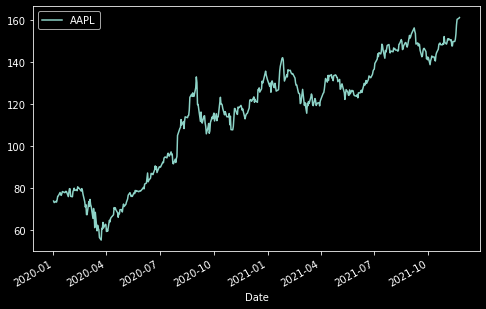

In [214]:
#precios de cierre de Apple del año pasado hasta la fecha
plt.style.use(['dark_background'])

ticker = ['AAPL']
start_date = '2020-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [215]:
closes_aapl.iloc[-1]

Symbols
AAPL    161.41
Name: 2021-11-23 00:00:00, dtype: float64

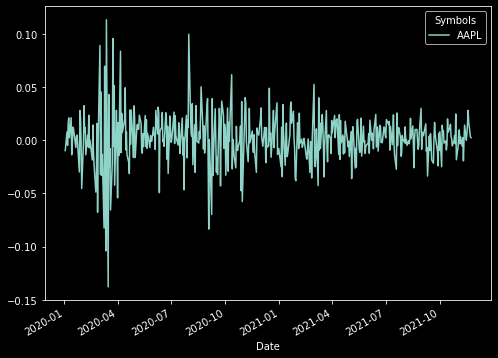

In [216]:
#graficar rendimientos logarítmicos
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [159]:
import yfinance as yf

def options_yf(ticker : "Ticker en formato string"):
    """
    options_yf descarga información de opciones financieras con ayuda de yfinance
    
    *ticker : es el símbolo de cotización de la acción
    """
    stock = yf.Ticker(ticker)
    calls, puts = stock.option_chain(stock.options[0]) 
    return calls, puts

In [217]:
c, p = options_yf("AAPL")
p

,contractSymbol,lastTradeDate,strike,...,inTheMoney,contractSize,currency
0,AAPL211126P00075000,2021-11-08 17:30:26,75.0,...,False,REGULAR,USD
1,AAPL211126P00080000,2021-11-23 16:26:22,80.0,...,False,REGULAR,USD
2,AAPL211126P00085000,2021-11-04 16:22:20,85.0,...,False,REGULAR,USD
3,AAPL211126P00090000,2021-10-25 16:04:20,90.0,...,False,REGULAR,USD
4,AAPL211126P00095000,2021-11-05 14:34:21,95.0,...,False,REGULAR,USD
...,...,...,...,...,...,...,...
52,AAPL211126P00185000,2021-11-23 20:54:09,185.0,...,True,REGULAR,USD
53,AAPL211126P00190000,2021-11-23 14:44:12,190.0,...,True,REGULAR,USD
54,AAPL211126P00195000,2021-11-23 17:23:20,195.0,...,True,REGULAR,USD
55,AAPL211126P00200000,2021-11-23 14:44:04,200.0,...,True,REGULAR,USD


In [218]:
K = 110 # strike price
indice_opt = p.loc[(p.strike==K)]
indice_opt

,contractSymbol,lastTradeDate,strike,...,inTheMoney,contractSize,currency
7,AAPL211126P00110000,2021-11-19 18:05:36,110.0,...,False,REGULAR,USD


In [219]:
i_opt= indice_opt.index
opcion_valuar = p.loc[i_opt[0]]
opcion_valuar

contractSymbol       AAPL211126P00110000
lastTradeDate        2021-11-19 18:05:36
strike                             110.0
lastPrice                           0.01
bid                                  0.0
                            ...         
openInterest                        2512
impliedVolatility                  1.375
inTheMoney                         False
contractSize                     REGULAR
currency                             USD
Name: 7, Length: 14, dtype: object

Por el contractSymbol se sabe que expira el 26 de noviembre del 2021. Lo comprobé buscando el contractSymbol en Yahoo Finance.

Por último, busqué en Yahoo Finance el precio del activo subyacente.

In [220]:
print('Precio del activo subyacente actual = ',160.55)

Precio del activo subyacente actual =  160.55


In [221]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2020-01-03,-0.010
2020-01-06,0.008
2020-01-07,-0.005
2020-01-08,0.016
2020-01-09,0.021
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [222]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-02-18'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
                '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
                '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
                '2022-02-03', '2022-02-04', '2022-02-07', '2022-

In [223]:
# simular precios usando rendimientos 

dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-23,-2.159e-03,-1.254e-02,1.432e-02,...,4.218e-03,-1.049e-02,-7.868e-03
2021-11-24,6.453e-05,-1.804e-04,-3.831e-04,...,-7.801e-06,-2.039e-05,-1.417e-04
2021-11-25,-1.172e-06,-7.577e-06,2.699e-07,...,-2.231e-07,2.745e-08,-1.486e-07
2021-11-26,-4.255e-08,1.282e-07,1.643e-09,...,-2.313e-10,-2.216e-10,-3.619e-09
2021-11-29,8.004e-12,-7.925e-09,2.521e-11,...,6.308e-12,-6.106e-12,-1.956e-10
...,...,...,...,...,...,...,...
2022-02-14,6.057e-117,3.391e-113,4.975e-111,...,-5.338e-116,-1.959e-110,1.032e-122
2022-02-15,1.922e-118,9.017e-115,1.051e-112,...,7.252e-118,-3.625e-112,-4.290e-124
2022-02-16,1.130e-119,8.789e-117,-9.806e-116,...,-1.340e-119,-1.196e-113,-1.257e-125
2022-02-17,2.805e-122,6.399e-119,1.010e-117,...,-8.599e-122,-5.876e-115,3.637e-128


In [225]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
#pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
#plt.title('Simulación de precios usando rendimiento simple');

In [226]:
#rendimiento logarítmico
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Usando la equivalencia teórica
mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
#pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
#plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.30362475611717293

In [227]:
S_T2.iloc[0, :] = closes_aapl.iloc[-1]
S_T2

,0,1,2,...,9997,9998,9999
2021-11-23,161.410,161.410,161.410,...,161.410,161.410,161.410
2021-11-24,156.230,161.614,159.324,...,161.701,159.945,162.963
2021-11-25,153.374,168.502,159.166,...,166.347,159.684,163.087
2021-11-26,159.002,165.626,160.093,...,166.472,158.354,167.061
2021-11-29,158.927,155.653,162.522,...,161.946,162.733,176.290
...,...,...,...,...,...,...,...
2022-02-14,170.111,180.529,147.449,...,172.417,242.508,172.563
2022-02-15,175.545,185.343,150.554,...,170.042,246.967,165.491
2022-02-16,186.128,187.105,150.371,...,166.882,255.182,170.364
2022-02-17,186.537,188.419,148.787,...,167.909,267.956,169.823


In [228]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.02381956602799824, 0.02382440619684715)

$$
max(S_T - K,0)
$$

Prima    2.069
Name: 2022-02-18 00:00:00, dtype: float64

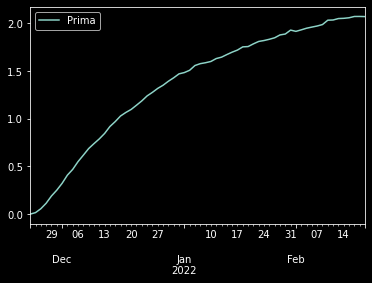

In [229]:
strike = 150
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2, 0).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

In [230]:
# Valuación usando simulación: modelo normal para los rendimientos

#Hallar media y desviación estándar muestral de los rendimientos logarítmicos:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0016318797918602026, 0.02382440619684715)

In [232]:
# Tasa de bonos de 1 yr de fecha 23/11/21 -> 0.18%
r = 0.0021/360 # Tasa diaria

In [233]:
#Simular el tiempo de contrato desde HOY hasta la fecha de Expiry, 10 escenarios:

from datetime import date

today = pd.Timestamp(date.today())
expiry = pd.to_datetime('2022-02-18')

nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
      

In [234]:
#Generar 10 escenarios de rendimientos simulados y guardamos en un dataframe
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2021-11-23,-0.023,-0.033,4.164e-02,...,0.009,-5.895e-03,0.006
2021-11-24,-0.041,-0.015,5.689e-02,...,0.029,-7.521e-04,0.021
2021-11-25,-0.016,-0.003,8.560e-02,...,-0.005,-4.236e-02,0.075
2021-11-26,-0.021,-0.024,1.000e-01,...,-0.033,1.830e-02,0.079
2021-11-29,-0.051,-0.008,1.133e-01,...,-0.039,3.797e-02,0.080
...,...,...,...,...,...,...,...
2022-02-14,-0.185,-0.018,4.764e-05,...,-0.299,3.233e-01,0.296
2022-02-15,-0.200,0.021,2.893e-02,...,-0.294,3.358e-01,0.307
2022-02-16,-0.218,0.014,3.215e-02,...,-0.268,3.097e-01,0.342
2022-02-17,-0.214,-0.013,5.908e-02,...,-0.251,3.017e-01,0.319


In [235]:
#calcular los escenarios de precios respectivos
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,157.706,156.207,168.273,...,162.855,160.461,162.362
2021-11-24,154.964,159.026,170.859,...,166.236,161.289,164.868
2021-11-25,158.781,160.937,175.835,...,160.660,154.715,173.934
2021-11-26,158.074,157.643,178.388,...,156.184,164.390,174.676
2021-11-29,153.314,160.110,180.777,...,155.260,167.657,174.791
...,...,...,...,...,...,...,...
2022-02-14,134.131,158.529,161.418,...,119.748,223.014,216.973
2022-02-15,132.122,164.885,166.149,...,120.343,225.815,219.419
2022-02-16,129.742,163.694,166.684,...,123.407,220.012,227.280
2022-02-17,130.274,159.385,171.233,...,125.549,218.251,222.044


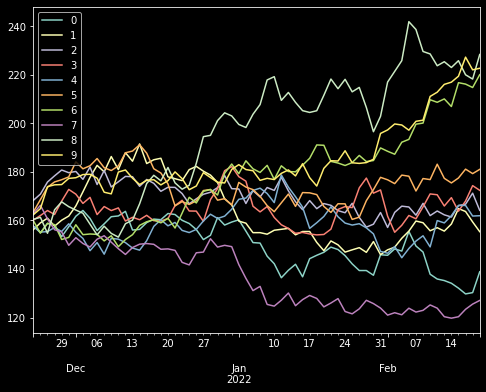

In [236]:
sim_closes.plot(figsize=(8,6));

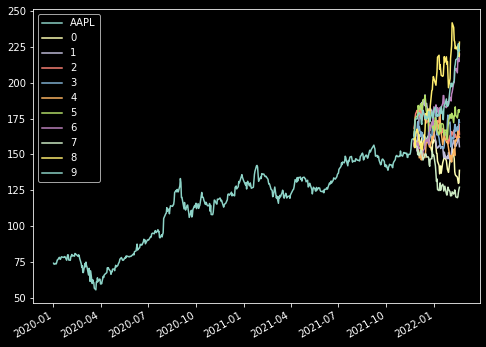

In [237]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [238]:
from datetime import date
Hoy = date.today()
K = 150  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-23,164.805,161.132,163.864,...,164.858,160.799,156.598
2021-11-24,167.304,159.835,166.527,...,161.662,156.322,153.544
2021-11-25,167.893,160.888,167.789,...,160.892,160.502,147.579
2021-11-26,161.822,156.164,164.450,...,160.211,158.172,147.865
2021-11-27,159.788,156.023,162.870,...,161.860,162.606,148.586
...,...,...,...,...,...,...,...
2022-01-21,148.781,142.777,144.173,...,148.031,200.116,140.650
2022-01-22,149.253,145.188,148.073,...,150.829,199.786,143.269
2022-01-23,151.634,149.829,149.949,...,151.902,197.441,139.046
2022-01-24,149.605,141.020,146.787,...,147.895,205.319,141.470


In [239]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-23,161.410,161.410,161.410,...,161.410,161.410,161.410
2021-11-24,167.304,159.835,166.527,...,161.662,156.322,153.544
2021-11-25,167.893,160.888,167.789,...,160.892,160.502,147.579
2021-11-26,161.822,156.164,164.450,...,160.211,158.172,147.865
2021-11-27,159.788,156.023,162.870,...,161.860,162.606,148.586
...,...,...,...,...,...,...,...
2022-01-21,148.781,142.777,144.173,...,148.031,200.116,140.650
2022-01-22,149.253,145.188,148.073,...,150.829,199.786,143.269
2022-01-23,151.634,149.829,149.949,...,151.902,197.441,139.046
2022-01-24,149.605,141.020,146.787,...,147.895,205.319,141.470


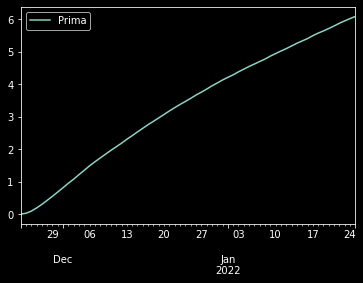

In [240]:
strike = 150
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [241]:
#La valuación de la opción es:
put.iloc[-1]

Prima    6.086
Name: 2022-01-25 00:00:00, dtype: float64

In [242]:
# Intervalo de confianza del 99%
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(5.828431353963638, 6.344114515047509)
(5.828436275491869, 6.344109593519278)


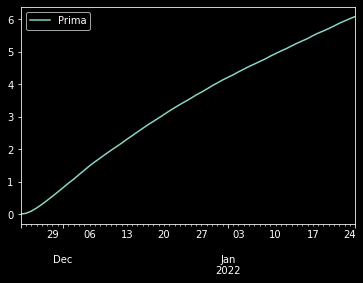

In [243]:
# Precios simulados usando técnicas de reducción de varianza

# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [244]:
#La valuación de la opción es:
put.iloc[-1]

Prima    6.086
Name: 2022-01-25 00:00:00, dtype: float64

In [245]:
#Intervalo de confianza del 99%
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(5.828431353963638, 6.344114515047509)
(5.828431353963638, 6.344114515047509)


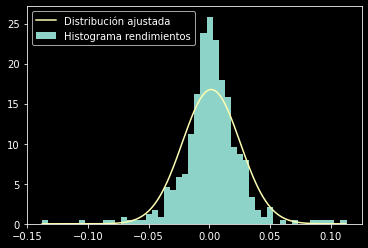

In [246]:
#Análisis de la distribución de los rendimientos

#Ajustando norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

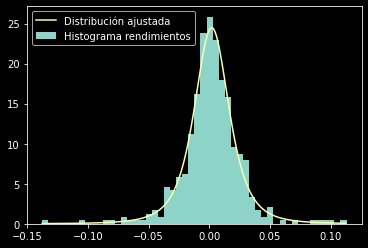

In [247]:
#Ajustando t

ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

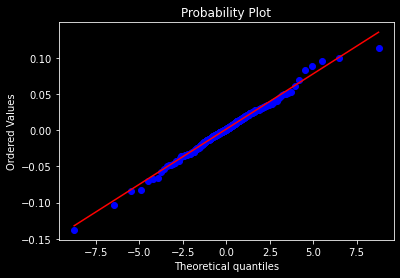

In [248]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt); #con t

In [250]:
#Valuación usando simulación: uso del histograma de rendimientos

ndays = 109 
nscen = 10 #escenarios

#Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable y
prob = y/np.sum(y)
values = x[1:]

In [251]:
#generar los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-11-23,0.013,-0.002,-0.052,...,0.003,0.013,0.008
2021-11-24,0.033,0.028,0.013,...,0.013,-0.027,-0.027
2021-11-25,-0.002,0.003,-0.007,...,0.008,-0.017,0.013
2021-11-26,-0.002,-0.022,0.023,...,0.008,0.008,0.013
2021-11-27,-0.067,-0.002,-0.002,...,0.008,0.003,0.088
...,...,...,...,...,...,...,...
2022-03-07,0.033,0.008,0.028,...,-0.017,0.008,-0.017
2022-03-08,0.013,-0.007,-0.022,...,0.023,-0.012,0.013
2022-03-09,-0.002,0.023,-0.002,...,0.028,-0.007,0.023
2022-03-10,0.018,-0.002,-0.012,...,-0.012,-0.002,0.028


In [253]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-11-23,163.491,161.049,153.168,...,161.859,163.491,162.673
2021-11-24,168.956,165.599,155.143,...,163.946,159.084,158.288
2021-11-25,168.578,166.060,154.021,...,165.229,156.357,160.329
2021-11-26,168.201,162.396,157.580,...,166.521,157.580,162.396
2021-11-27,157.227,162.032,157.227,...,167.824,158.018,177.347
...,...,...,...,...,...,...,...
2022-03-07,222.650,191.537,243.694,...,172.383,262.742,256.233
2022-03-08,225.521,190.152,238.317,...,176.366,259.536,259.536
2022-03-09,225.016,194.546,237.784,...,181.350,257.659,265.534
2022-03-10,229.064,194.111,234.883,...,179.137,257.083,273.037


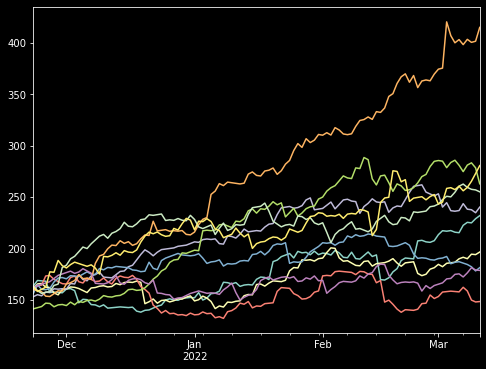

In [254]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

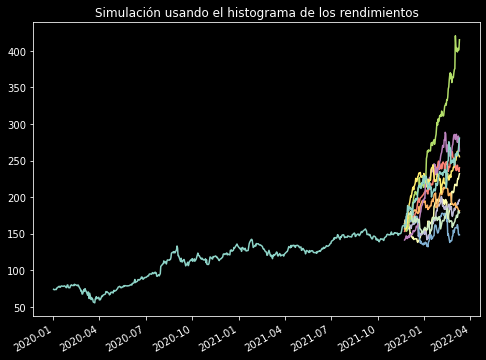

In [255]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [256]:
K=150
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

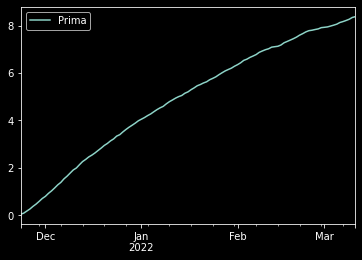

In [258]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [259]:
put_hist.iloc[-1]

Prima    8.378
Name: 2022-03-11 00:00:00, dtype: float64

In [260]:
opcion_valuar

contractSymbol       AAPL211126P00110000
lastTradeDate        2021-11-19 18:05:36
strike                             110.0
lastPrice                           0.01
bid                                  0.0
                            ...         
openInterest                        2512
impliedVolatility                  1.375
inTheMoney                         False
contractSize                     REGULAR
currency                             USD
Name: 7, Length: 14, dtype: object

In [262]:
#Intervalo de confianza del 95%
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(7.555469864235698, 9.200605929416339)
(7.555469864235698, 9.200605929416339)


**Ahora comparar con los resultados teoricos del método de valuación de Black-Scholes:**

Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$

In [ ]:
K = 150
St = closes_aapl.iloc[-1,0]
r = r*360
sigma = sigma * np.sqrt(252)

In [272]:
#Black Scholes
d1 = (np.log(St/K) + (r+0.5*sigma**2))/sigma
d2 = (np.log(St/K) + (r-0.5*sigma**2))/sigma
put2 = St* norm.cdf(d1) - K * np.exp(r*ndays) * norm.cdf(d2)

print('El valor de la opción con Black Scholes es:',put2)
print('Valor de la opción simulado es de:',put.iloc[-1].values)

El valor de la opción con Black Scholes es: 10.040443777612367
Valor de la opción simulado es de: [6.08627293]


# Código de solución estudiante 2

In [62]:
import yfinance as yf

def options_yf(ticker : "Ticker en formato string"):
    """
    options_yf descarga información de opciones financieras con ayuda de yfinance
    
    *ticker : es el símbolo de cotización de la acción
    """
    stock = yf.Ticker(ticker)
    calls, puts = stock.option_chain(stock.options[0]) 
    return calls, puts

c, p = options_yf("AAPL")

In [63]:
p.head()

,contractSymbol,lastTradeDate,strike,...,inTheMoney,contractSize,currency
0,AAPL211126P00075000,2021-11-08 17:30:26,75.0,...,False,REGULAR,USD
1,AAPL211126P00080000,2021-11-23 16:26:22,80.0,...,False,REGULAR,USD
2,AAPL211126P00085000,2021-11-04 16:22:20,85.0,...,False,REGULAR,USD
3,AAPL211126P00090000,2021-10-25 16:04:20,90.0,...,False,REGULAR,USD
4,AAPL211126P00095000,2021-11-05 14:34:21,95.0,...,False,REGULAR,USD


In [64]:
#Precio del activo subyacente
aapl_price = 161 #dato obtenido de Yahoo Finance de forma directa
# Opción elegida 
p.iloc[47,2] # Strike de la opción elegida

170.0

#### Precios (Adj Close) AAPL

In [65]:
data = pd.read_csv('AAPL.csv')
data=data.set_index('Date')
closes_aapl=pd.DataFrame(data['Adj Close'])
closes_aapl.head()

,Adj Close
Date,
2017-01-03,27.332
2017-01-04,27.302
2017-01-05,27.441
2017-01-06,27.747
2017-01-09,28.001


<AxesSubplot:xlabel='Date'>

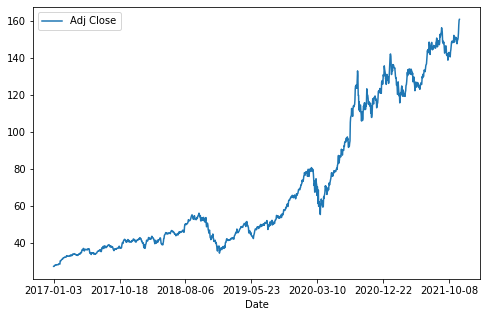

In [66]:
closes_aapl.plot(figsize=(8,5))

In [67]:
# Precio del activo subyacente
price = closes_aapl.iloc[-1]
price 

Adj Close    161.02
Name: 2021-11-22, dtype: float64

In [68]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

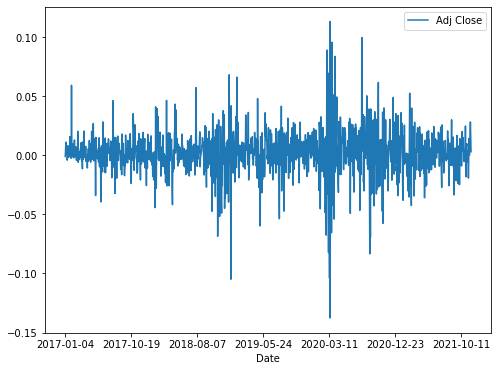

In [69]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [70]:
K = 161.02 # strike price
indice_opt = p.iloc[47,:]
df = pd.DataFrame(indice_opt)
df

,47
contractSymbol,AAPL211126P00170000
lastTradeDate,2021-11-23 20:59:51
strike,170.0
lastPrice,8.47
bid,8.45
...,...
openInterest,991
impliedVolatility,0.512
inTheMoney,True
contractSize,REGULAR


In [71]:
print('Precio del activo subyacente actual = ',price)

Precio del activo subyacente actual =  Adj Close    161.02
Name: 2021-11-22, dtype: float64


## Simulación de precios usando rendimiento simple y logarítmico 

### Rendimiento Simple

In [72]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

,Adj Close
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001


In [73]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-02-18'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
                '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
                '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
                '2022-02-03', '2022-02-04', '2022-02-07', '2022-

In [74]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-23,-1.211e-02,8.840e-03,-2.360e-02,...,-5.711e-03,2.640e-02,2.098e-02
2021-11-24,3.208e-06,-1.761e-04,-3.278e-04,...,6.706e-05,-1.658e-04,1.545e-04
2021-11-25,3.444e-08,-7.308e-07,1.511e-06,...,-1.867e-06,-3.197e-06,-3.934e-06
2021-11-26,-5.183e-11,-2.205e-08,1.026e-08,...,-5.454e-08,1.101e-08,-1.195e-08
2021-11-29,9.590e-13,-3.676e-10,2.875e-10,...,4.231e-10,8.746e-11,1.637e-10
...,...,...,...,...,...,...,...
2022-02-14,1.094e-126,-1.008e-119,3.468e-117,...,3.466e-124,3.473e-116,2.829e-120
2022-02-15,-2.974e-129,-1.155e-121,3.813e-119,...,-1.267e-126,8.438e-118,-1.414e-122
2022-02-16,3.803e-131,-2.164e-123,-3.472e-121,...,-1.278e-128,-2.826e-119,-2.130e-124
2022-02-17,1.762e-133,3.161e-125,1.098e-122,...,8.370e-131,5.528e-121,-1.600e-126


In [75]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

### Rendimiento Logarítmico

In [76]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.1917315277561411

In [77]:
S_T2.iloc[0, :] = closes_aapl.iloc[-1]
S_T2.head()

,0,1,2,...,9997,9998,9999
2021-11-23,161.020,161.020,161.020,...,161.020,161.020,161.020
2021-11-24,158.979,159.184,159.404,...,158.173,164.235,165.592
2021-11-25,160.667,159.817,158.640,...,153.796,167.406,161.396
2021-11-26,160.395,164.688,159.693,...,158.330,166.799,161.857
2021-11-29,157.422,167.427,164.203,...,157.076,168.099,159.623


In [78]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019188036324283418, 0.01920576822195562)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
max(K - S_T,0)
$$

Prima    6.359
Name: 2022-02-18 00:00:00, dtype: float64

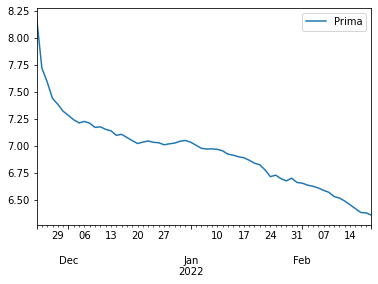

In [79]:
strike = 170
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2, 0).mean(axis=1)}, index=dates)
put.plot();
put.iloc[-1]

### <font color = 'red'> LA PRIMA ESTIMADA ES DE 6.359 </font>

### 2. Valuación usando simulación: modelo normal para los rendimientos

In [110]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014406605684881965, 0.01920576822195562)

In [111]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.0021%
r = 0.0021/360 # Tasa diaria

In [112]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = pd.to_datetime('2022-02-18')

nscen = 10
dates = pd.date_range(start=today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
               '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
      

In [113]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum().head()

,0,1,2,...,7,8,9
2021-11-23,2.057e-02,-0.016,-0.026,...,0.012,-0.004,0.020
2021-11-24,3.431e-02,-0.004,-0.024,...,0.040,0.032,0.042
2021-11-25,1.314e-02,0.013,0.003,...,0.043,0.027,0.027
2021-11-26,-1.727e-04,-0.018,0.007,...,0.045,0.019,0.011
2021-11-29,-5.364e-03,-0.017,0.018,...,0.028,0.027,0.019


In [114]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.head()

,0,1,2,...,7,8,9
2021-11-23,164.367,158.398,156.837,...,162.931,160.409,164.332
2021-11-24,166.641,160.334,157.250,...,167.664,166.221,167.947
2021-11-25,163.150,163.060,161.478,...,168.154,165.363,165.449
2021-11-26,160.992,158.144,162.147,...,168.374,164.074,162.785
2021-11-29,160.159,158.281,164.024,...,165.561,165.451,164.126


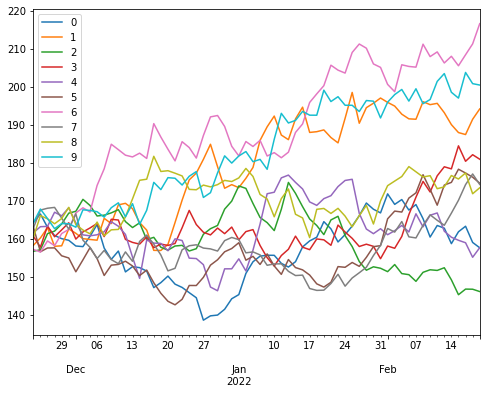

In [115]:
sim_closes.plot(figsize=(8,6));

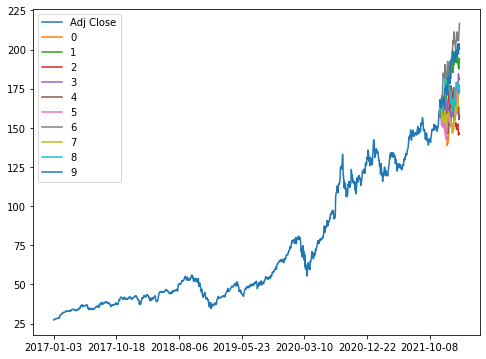

In [116]:
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [117]:
sigma =0.01920576822195562 / np.sqrt(252)

In [118]:
from datetime import date
Hoy = date.today()
K =  170  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes.head()

,0,1,2,...,99997,99998,99999
2021-11-23,160.981,160.862,160.885,...,161.202,160.930,161.033
2021-11-24,160.690,160.855,160.952,...,161.138,160.739,161.165
2021-11-25,160.836,160.712,160.904,...,160.964,160.903,161.161
2021-11-26,161.230,161.116,160.906,...,160.963,160.769,161.189
2021-11-27,161.671,161.277,161.324,...,161.163,160.801,161.034


In [119]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes.head()

,0,1,2,...,99997,99998,99999
2021-11-23,161.020,161.020,161.020,...,161.020,161.020,161.020
2021-11-24,160.690,160.855,160.952,...,161.138,160.739,161.165
2021-11-25,160.836,160.712,160.904,...,160.964,160.903,161.161
2021-11-26,161.230,161.116,160.906,...,160.963,160.769,161.189
2021-11-27,161.671,161.277,161.324,...,161.163,160.801,161.034


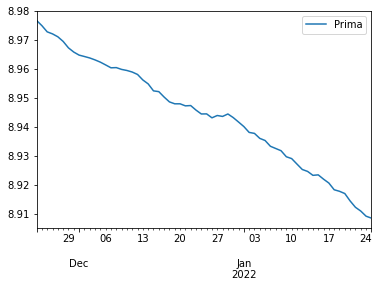

In [120]:
strike = 170
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [121]:
put.iloc[-1]

Prima    8.909
Name: 2022-01-25 00:00:00, dtype: float64

In [122]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(8.895849568151613, 8.921303131935852)
(8.895849811072932, 8.921302889014534)


### <font color = 'red'> LA PRIMA ESTIMADA ES DE 8.909 </font>

### Precios simulados usando técnicas de reducción de varianza

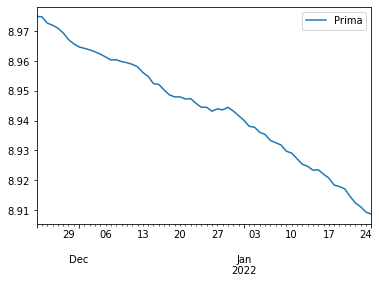

In [123]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [124]:
put.iloc[-1]

Prima    8.909
Name: 2022-01-25 00:00:00, dtype: float64

In [125]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(8.895849568151613, 8.921303131935852)
(8.895849568151613, 8.921303131935852)


### <font color = 'red'>LA PRIMA ESTIMADA ES DE 8.909  </font>

### Análisis de la distribución de los rendimientos

#### Ajustando norm

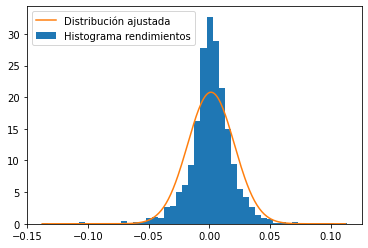

In [126]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren,bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

#### Ajustando t

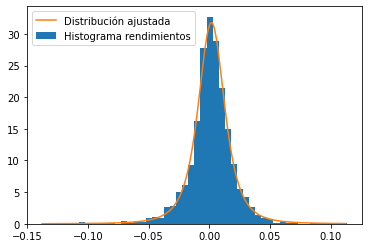

In [127]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren,bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen, df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### 3. Valuación usando simulación: uso del histograma de rendimientos

In [128]:
ndays = 64
nscen = 10

In [129]:
prob = y/np.sum(y)
values = x[1:]

In [130]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head()

,0,1,2,...,7,8,9
2021-11-23,-0.022,0.018,0.013,...,0.003,0.008,0.008
2021-11-24,0.013,0.053,0.043,...,0.008,-0.012,0.008
2021-11-25,0.018,0.008,0.048,...,0.008,0.003,-0.012
2021-11-26,0.003,-0.012,0.008,...,-0.002,0.023,0.008
2021-11-27,-0.017,-0.022,-0.022,...,-0.002,0.033,-0.007


In [131]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,...,7,8,9
2021-11-23,157.467,163.917,163.096,...,161.468,162.280,162.280
2021-11-24,159.498,172.830,170.248,...,162.731,160.300,163.550
2021-11-25,162.367,174.182,178.607,...,164.004,160.746,161.554
2021-11-26,162.818,172.057,180.004,...,163.637,164.460,162.818
2021-11-27,160.027,168.261,176.033,...,163.271,169.958,161.641


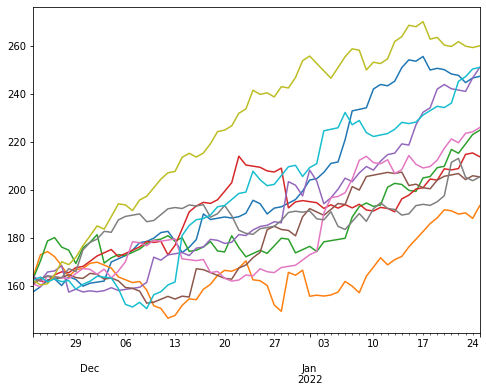

In [132]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

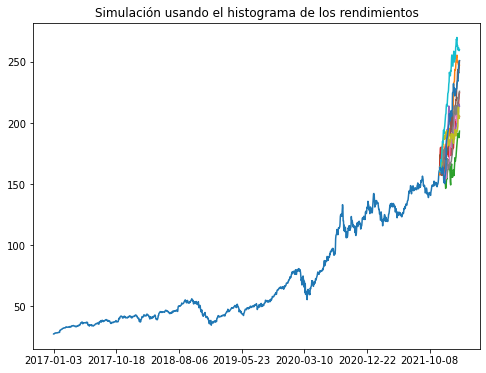

In [133]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [134]:
K=170
ndays = 64 
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2021-11-23',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

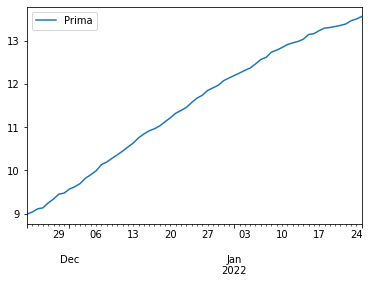

In [139]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [140]:
put_hist.iloc[-1]

Prima    13.558
Name: 2022-01-25 00:00:00, dtype: float64

In [141]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(13.056014606660785, 14.060744589404251)
(13.056014606660785, 14.060744589404251)


### <font color = 'red'> LA PRIMA ESTIMADA ES DE 13.558 </font>

## BLACK & SCHOLES

In [142]:
K = 150
St = 161.02
r = 0.0021
sigma = sigma * np.sqrt(252)
T = 64/360

In [143]:
from scipy.stats import norm
d1 = (np.log(St/K) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = (np.log(St/K) + (r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
put2 = St* norm.cdf(d1) - K * np.exp(r*T) * norm.cdf(d2)
put2

10.963989545365678

### <font color = 'red'>LA PRIMA ESTIMADA POR BLACK AND SCHOLES ES DE 10.96 </font>